#  Diabetes Prediction Project

We will build a **Diabetes Prediction Model** using:

* Python
* Pandas
* Matplotlib
* Scikit-learn
* Pima Indians Diabetes Dataset

---
---

## 1️.Problem Statement

We want to predict whether a patient has diabetes based on medical features like:

* Glucose
* Blood Pressure
* BMI
* Insulin
* Age
* etc.

This is a **Binary Classification Problem**:

```
0 → No Diabetes
1 → Diabetes
```

---
---

## 2️. Dataset Information

We use the **Pima Indians Diabetes Dataset**.

**Important Features:**

| Feature                  | Meaning                      |
| ------------------------ | ---------------------------- |
| Pregnancies              | No. of times pregnant        |
| Glucose                  | Plasma glucose concentration |
| BloodPressure            | Diastolic blood pressure     |
| SkinThickness            | Skin fold thickness          |
| Insulin                  | 2-Hour serum insulin         |
| BMI                      | Body Mass Index              |
| DiabetesPedigreeFunction | Genetic influence            |
| Age                      | Age of patient               |
| Outcome                  | 0 or 1 (Target variable)     |

---

# 3️. Step-by-Step Machine Learning Process

1. Import Libraries
2. Load Dataset
3. Data Cleaning
4. Exploratory Data Analysis
5. Train-Test Split
6. Model Building
7. Model Evaluation
8. Prediction

In [1]:
## Step 1: Import Libraries
# Importing required libraries

import numpy as np              # For numerical operations
import pandas as pd             # For data handling
import matplotlib.pyplot as plt # For visualization
import seaborn as sns           # For advanced visualization

from sklearn.model_selection import train_test_split  # To split data
from sklearn.preprocessing import StandardScaler      # For feature scaling
from sklearn.linear_model import LogisticRegression   # ML model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# step 2. reading a csv data files
df = pd.read_csv("diabetes.csv")

In [4]:
# Display first 5 rows
# read_csv() loads dataset
# head() shows first 5 rows

print(df.head(12))

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   

    DiabetesPedigreeFunction  Age  Outcome  
0    

In [5]:
## Step 3: Basic Data Checking
print(df.shape)       # Rows and Columns

(768, 9)


In [6]:
print(df.info())      # Data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [7]:
print(df.describe())  # Statistical summary

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

###  Why?

To understand structure  --> 
To check missing values --> 
To check outliers-->

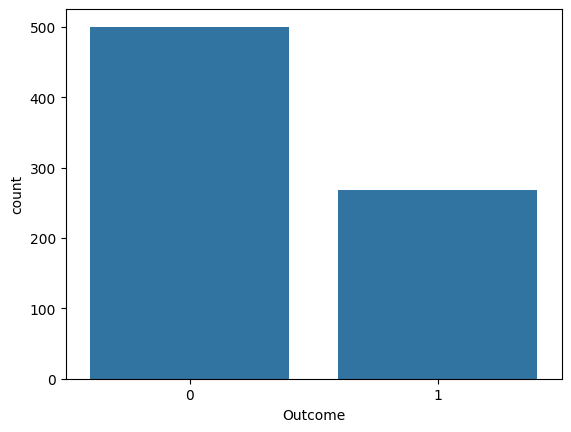

In [10]:
### Why Median?
# Median handles outliers better than mean.
## Step 5: Check Target Distribution

sns.countplot(x='Outcome', data=df)
plt.show()

# This checks if dataset is balanced.

In [11]:
# Step 4: Data Cleaning
# In this dataset, some values like **Glucose, BMI, BloodPressure = 0**, which is not realistic.
# Replace 0 values with median

cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for col in cols:
    df[col] = df[col].replace(0, df[col].median())

In [14]:
## Step 6: Split Features and Target
X = df.drop("Outcome", axis=1)  # Independent variables 
y = df["Outcome"]               # Target variable
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35     30.5  33.6   
1              1       85             66             29     30.5  26.6   
2              8      183             64             23     30.5  23.3   
3              1       89             66             23     94.0  28.1   
4              0      137             40             35    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48    180.0  32.9   
764            2      122             70             27     30.5  36.8   
765            5      121             72             23    112.0  26.2   
766            1      126             60             23     30.5  30.1   
767            1       93             70             31     30.5  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [16]:
## Step 7: Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Explanation:
# test_size=0.2   → 20% data for testing
# random_state=42 → Same split every time

In [18]:
## Step 8: Feature Scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Why Scaling?
# Logistic Regression works better when data is normalized.
# Mean = 0, Standard deviation = 1

In [19]:
##  Step 9: Build Model

model = LogisticRegression()
model.fit(X_train, y_train)

### Explanation:
# fit() → Model learns patterns from training data.

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [20]:
## Step 10: Make Predictions

y_pred = model.predict(X_test)

In [22]:
##  Step 11: Evaluate Model

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7662337662337663


In [23]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[82 17]
 [19 36]]


In [24]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



# Understanding Evaluation Metrics
###  Accuracy

Correct Predictions / Total Predictions

###  Confusion Matrix

|          | Pred 0 | Pred 1 |
| -------- | ------ | ------ |
| Actual 0 | TN     | FP     |
| Actual 1 | FN     | TP     |

###  Classification Report

* Precision
* Recall
* F1-score

In [25]:
# Step 12: Predict for New Patient

# Example patient data
new_data = np.array([[2,120,70,20,85,28.5,0.5,30]])

# Scale the input
new_data_scaled = scaler.transform(new_data)

# Predict
prediction = model.predict(new_data_scaled)

if prediction[0] == 1:
    print("Diabetic")
else:
    print("Not Diabetic")

Diabetic


In [26]:
# # Optional Improvements 
# You can improve model by:

# * Using Random Forest
# * Using XGBoost
# * Using Cross Validation
# * Handling class imbalance (SMOTE)
# * Hyperparameter tuning

# Example:


from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print("RF Accuracy:", accuracy_score(y_test, rf.predict(X_test)))

RF Accuracy: 0.7597402597402597


In [ ]:
#  Clean Interview Notes 
###  Type of Problem:
✔ Supervised Learning
✔ Classification
✔ Binary Classification

### Algorithm Used:
✔ Logistic Regression

### Why Logistic Regression?

* Simple
* Fast
* Works well for binary classification
* Gives probability output

###  Important ML Concepts Used:

* Train-Test Split
* Feature Scaling
* Confusion Matrix
* Accuracy
* Overfitting
* Random State

# Interview Questions From This Project

1. Why did you use Logistic Regression?
2. What is feature scaling?
3. Why random_state is used?
4. What happens if dataset is imbalanced?
5. Difference between Precision and Recall?
6. What is Overfitting?



#  Final Summary

✔ Loaded Dataset
✔ Cleaned Data
✔ Scaled Features
✔ Trained Model
✔ Evaluated Accuracy
✔ Predicted New Patient
